In [ ]:
#На основе предоставленного набора данных о бенчмарках накопителей (SSD и HDD) требуется провести анализ производительности различных дисков.
#Датасет содержит характеристики, такие как объем накопителя, рейтинг производительности (diskMark),
#  цену, соотношение цена/производительность и дату тестирования.
#Задача заключается в том, чтобы проанализировать эти характеристики и определить,
#  какие из накопителей обладают наилучшей производительностью, а также выявить факторы, влияющие на производительность дисков.

In [ ]:
#Прочитать данные
import pandas as pd
data = pd.read_csv(r'C:\Users\chist\OneDrive\Desktop\test\SSD_HDD_benchmarks_v9.csv')

In [283]:
# Отображение первых нескольких строк данных
print(data.head())

                                driveName type  diskCapacity  diskMark  rank  \
0                 NVMe WDS500G1X0E-00AFY0  SSD         465.8     52280     1   
1      Seagate FireCuda 530 ZP4000GM30023  SSD        3600.0     52066     2   
2                  KINGSTON SKC3000S1024G  SSD         953.9     49829     3   
3  NVMe Samsung 980 PRO with Heatsink 2TB  SSD        1800.0     49517     4   
4                     KINGSTON SFYRD2000G  SSD        1800.0     48995     5   

   price  driveValue  priceperGB  testDate  samples  
0    NaN         NaN         NaN      2022        5  
1    NaN         NaN         NaN      2021       13  
2    NaN         NaN         NaN      2021       42  
3    NaN         NaN         NaN      2021        8  
4    NaN         NaN         NaN      2021       33  


In [284]:
# Отображение названий столбцов
print(data.columns)

Index(['driveName', 'type', 'diskCapacity', 'diskMark', 'rank', 'price',
       'driveValue', 'priceperGB', 'testDate', 'samples'],
      dtype='object')


In [ ]:
#driveName: Название модели накопителя, которое уникально идентифицирует каждый диск.

#type: Тип накопителя (SSD или HDD). Этот столбец позволяет классифицировать диски по технологии их работы.

#diskCapacity: Объем накопителя в гигабайтах (GB). Этот параметр показывает, сколько данных может хранить диск.

#diskMark: Рейтинг производительности накопителя, измеряемый в некой условной единице. Чем выше значение, тем лучше производительность.

#rank: Ранг накопителя по сравнению с другими дисками в датасете, основанный на его производительности.

#price: Цена накопителя.

#driveValue: Это значение, относится к общей оценке или ценности накопителя

#priceperGB: Цена за гигабайт, вычисляемая на основе цены и объема накопителя.

#testDate: Год, в котором проводился тест на производительность.

#samples: Количество тестов, проведенных для данного накопителя.

In [286]:
# Визуализация данных и расчет основных характеристик
data.describe()

,diskCapacity,diskMark,rank,price,driveValue,priceperGB,testDate,samples
count,8927.000000,8927.000000,8927.00000,2079.000000,2079.000000,2079.000000,8927.000000,8927.000000
mean,415.903279,4800.680968,4464.00000,133.229442,38.889836,0.687258,2015.008626,43.334379
std,683.292670,6794.141177,2577.14726,150.685948,57.104218,3.148252,3.682783,196.923990
min,0.572600,89.000000,1.00000,8.790000,0.720000,0.010000,2008.000000,1.000000
25%,119.200000,723.000000,2232.50000,52.090000,7.965000,0.140000,2012.000000,6.000000
50%,238.500000,2810.000000,4464.00000,89.000000,17.400000,0.310000,2015.000000,11.000000
75%,476.900000,4182.000000,6695.50000,152.505000,43.085000,0.700000,2018.000000,27.000000
max,14600.000000,52280.000000,8927.00000,1995.000000,630.890000,136.220000,2022.000000,6505.000000


In [287]:
data.describe(include='all')

,driveName,type,diskCapacity,diskMark,rank,price,driveValue,priceperGB,testDate,samples
count,8927,8927,8927.000000,8927.000000,8927.00000,2079.000000,2079.000000,2079.000000,8927.000000,8927.000000
unique,8014,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,SPCC Solid State,SSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,11,6266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,415.903279,4800.680968,4464.00000,133.229442,38.889836,0.687258,2015.008626,43.334379
std,NaN,NaN,683.292670,6794.141177,2577.14726,150.685948,57.104218,3.148252,3.682783,196.923990
min,NaN,NaN,0.572600,89.000000,1.00000,8.790000,0.720000,0.010000,2008.000000,1.000000
25%,NaN,NaN,119.200000,723.000000,2232.50000,52.090000,7.965000,0.140000,2012.000000,6.000000
50%,NaN,NaN,238.500000,2810.000000,4464.00000,89.000000,17.400000,0.310000,2015.000000,11.000000
75%,NaN,NaN,476.900000,4182.000000,6695.50000,152.505000,43.085000,0.700000,2018.000000,27.000000


In [288]:
#Проверим, сколько категориальных и количественных признаков.
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']

print(f'Категориальные признаки (количество): {len(categorical_columns)}')
print(f'Категориальные признаки: {categorical_columns}')
print(f'Количественные признаки (количество): {len(numerical_columns)}')
print(f'Количественные признаки: {numerical_columns}')

Категориальные признаки (количество): 2
Категориальные признаки: ['driveName', 'type']
Количественные признаки (количество): 8
Количественные признаки: ['diskCapacity', 'diskMark', 'rank', 'price', 'driveValue', 'priceperGB', 'testDate', 'samples']


In [289]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Построим корреляционную матрицу
corr_data = data.corr(numeric_only=True)
corr_data

,diskCapacity,diskMark,rank,price,driveValue,priceperGB,testDate,samples
diskCapacity,1.000000,0.228553,-0.146675,0.214115,-0.019555,-0.108189,0.217623,0.026185
diskMark,0.228553,1.000000,-0.742176,0.259455,0.714237,-0.043449,0.618351,0.152416
rank,-0.146675,-0.742176,1.000000,-0.348316,-0.619512,0.058314,-0.781123,-0.114874
price,0.214115,0.259455,-0.348316,1.000000,-0.140066,0.107992,0.155798,-0.022617
driveValue,-0.019555,0.714237,-0.619512,-0.140066,1.000000,-0.074911,0.604732,0.228968
priceperGB,-0.108189,-0.043449,0.058314,0.107992,-0.074911,1.000000,-0.089826,-0.029896
testDate,0.217623,0.618351,-0.781123,0.155798,0.604732,-0.089826,1.000000,0.063224
samples,0.026185,0.152416,-0.114874,-0.022617,0.228968,-0.029896,0.063224,1.000000


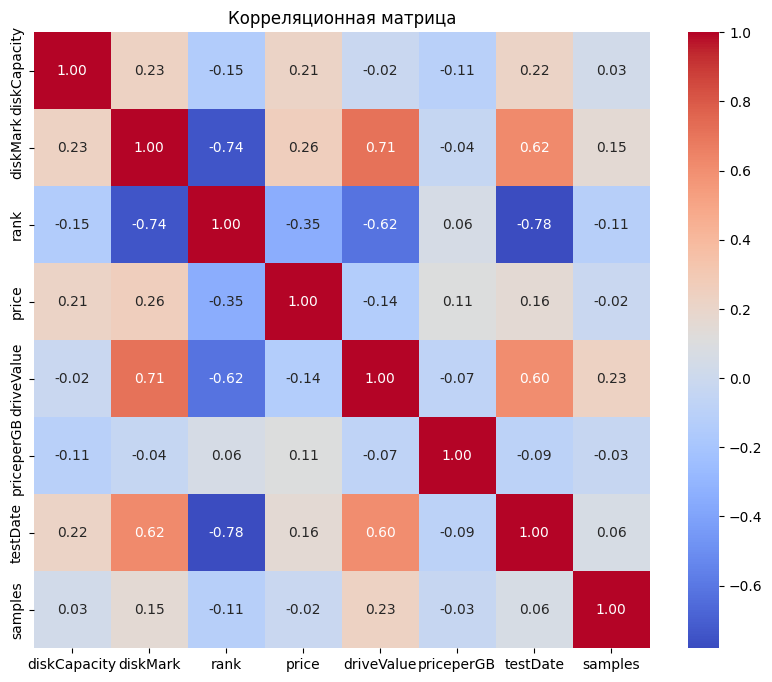

In [290]:
# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, square=True, cmap='coolwarm', annot=True, fmt=".2f")  # Добавляем аннотации
plt.title('Корреляционная матрица')
plt.show()

In [291]:
# Выводим пары с высокой корреляцией
high_corr = corr_data.where(np.triu(corr_data > 0.5, k=1)).stack().sort_values(ascending=False)
print(high_corr)

diskMark    driveValue    0.714237
            testDate      0.618351
driveValue  testDate      0.604732
dtype: float64


In [292]:
# diskMark и driveValue имеют сильную положительную корреляцию (0.71).
# diskMark и testDate также имеют высокую положительную корреляцию (0.62).
# driveValue и testDate имеют умеренную положительную корреляцию (0.60).
# Это говорит о том, что:
# Чем выше diskMark (рейтинг диска), тем выше driveValue (значение накопителя),
#  что логично, так как более производительные диски обычно имеют большую ценность.
# Существует также связь между diskMark и testDate. Возможно, более новые модели имеют лучшие характеристики,
#  что и приводит к более высокому рейтингу.
# Корреляция между driveValue и testDate указывает на то,
#  что более современные модели дисков, вероятно, имеют большую ценность.

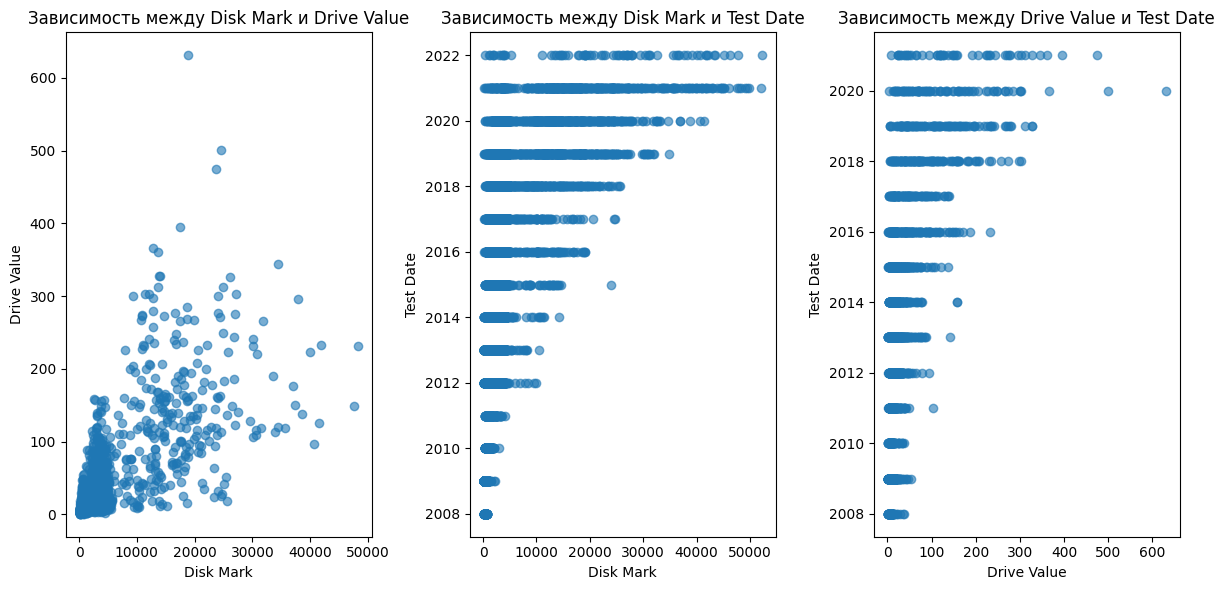

In [293]:
# Визуализация зависимостей между дисковыми признаками
plt.figure(figsize=(12, 6))

# diskMark vs driveValue
plt.subplot(1, 3, 1)
plt.scatter(data['diskMark'], data['driveValue'], alpha=0.6)
plt.xlabel('Disk Mark')
plt.ylabel('Drive Value')
plt.title('Зависимость между Disk Mark и Drive Value')

# diskMark vs testDate
plt.subplot(1, 3, 2)
plt.scatter(data['diskMark'], data['testDate'], alpha=0.6)
plt.xlabel('Disk Mark')
plt.ylabel('Test Date')
plt.title('Зависимость между Disk Mark и Test Date')

# driveValue vs testDate
plt.subplot(1, 3, 3)
plt.scatter(data['driveValue'], data['testDate'], alpha=0.6)
plt.xlabel('Drive Value')
plt.ylabel('Test Date')
plt.title('Зависимость между Drive Value и Test Date')

plt.tight_layout()
plt.show()

In [294]:
# Проверяем уникальные значения для каждого столбца
for c in data.columns:
    print(c, data[c].unique())

driveName ['NVMe WDS500G1X0E-00AFY0' 'Seagate FireCuda 530 ZP4000GM30023'
 'KINGSTON SKC3000S1024G' ... 'TOSHIBA MK3008GAL' 'IBM IC25N020ATCS04-0'
 'SSDPAMM0008G1']
type ['SSD' 'HDD']
diskCapacity [4.658e+02 3.600e+03 9.539e+02 1.800e+03 1.900e+03 9.315e+02 4.769e+02
 3.700e+03 2.385e+02 3.500e+03 8.943e+02 3.493e+02 4.471e+02 2.329e+02
 2.608e+02 9.314e+02 4.659e+02 1.700e+03 2.900e+03 3.540e+02 2.375e+02
 1.500e+03 2.236e+02 1.160e+04 1.192e+02 1.100e+03 7.452e+02 3.726e+02
 9.318e+02 2.338e+02 8.903e+02 8.942e+02 5.490e+01 4.472e+02 4.433e+02
 1.103e+02 2.795e+02 3.353e+02 4.720e+02 1.118e+02 1.130e+02 3.818e+02
 4.890e+02 6.500e+01 4.470e+02 2.234e+02 8.941e+02 7.311e+02 5.960e+02
 2.562e+02 3.911e+02 9.781e+02 2.124e+02 1.677e+02 3.725e+02 6.986e+02
 5.960e+01 5.589e+02 1.863e+02 4.000e+02 1.180e+02 5.120e+02 2.310e+02
 2.050e+02 5.962e+02 6.997e+02 2.200e+02 2.930e+01 2.360e+02 6.707e+02
 1.789e+02 2.384e+02 1.658e+02 1.191e+02 3.167e+02 5.590e+01 2.981e+02
 2.980e+01 8.380e+01 1

In [295]:
# Удаляем ненужные столбцы
data = data.drop(columns=['driveName'])

# Выводим обновленный датасет
print(data)


     type  diskCapacity  diskMark  rank  price  driveValue  priceperGB  \
0     SSD         465.8     52280     1    NaN         NaN         NaN   
1     SSD        3600.0     52066     2    NaN         NaN         NaN   
2     SSD         953.9     49829     3    NaN         NaN         NaN   
3     SSD        1800.0     49517     4    NaN         NaN         NaN   
4     SSD        1800.0     48995     5    NaN         NaN         NaN   
...   ...           ...       ...   ...    ...         ...         ...   
8922  SSD          24.8        96  8923    NaN         NaN         NaN   
8923  HDD          27.9        96  8924    NaN         NaN         NaN   
8924  HDD          27.9        94  8925  68.06        1.38        2.44   
8925  HDD          18.6        92  8926    NaN         NaN         NaN   
8926  SSD           7.4        89  8927    NaN         NaN         NaN   

      testDate  samples  
0         2022        5  
1         2021       13  
2         2021       42  
3      

In [296]:
# Проверка на пропущенные значения
print(data.isnull().sum())

type               0
diskCapacity       0
diskMark           0
rank               0
price           6848
driveValue      6848
priceperGB      6848
testDate           0
samples            0
dtype: int64


In [297]:
# Заполнение пропусков в столбце 'price' средним значением
data['price'] = data['price'].fillna(data['price'].mean())
data['driveValue'] = data['driveValue'].fillna(0)

In [298]:
# Проверка изменений после обработки пропусков
print("Проверка на пропущенные значения после обработки:")
print(data.isnull().sum())

Проверка на пропущенные значения после обработки:
type               0
diskCapacity       0
diskMark           0
rank               0
price              0
driveValue         0
priceperGB      6848
testDate           0
samples            0
dtype: int64


In [ ]:
# Вывод уникальных значений в определенном столбце
print("Уникальные значения в столбце 'price':")
print(data['price'].unique())

Уникальные значения в столбце 'price':
[133.22944204 209.         319.99       ...  63.96        16.
  68.06      ]


In [ ]:
# Вывод окончательного состояния
print(data)

     type  diskCapacity  diskMark  rank       price  driveValue  priceperGB  \
0     SSD         465.8     52280     1  133.229442        0.00         NaN   
1     SSD        3600.0     52066     2  133.229442        0.00         NaN   
2     SSD         953.9     49829     3  133.229442        0.00         NaN   
3     SSD        1800.0     49517     4  133.229442        0.00         NaN   
4     SSD        1800.0     48995     5  133.229442        0.00         NaN   
...   ...           ...       ...   ...         ...         ...         ...   
8922  SSD          24.8        96  8923  133.229442        0.00         NaN   
8923  HDD          27.9        96  8924  133.229442        0.00         NaN   
8924  HDD          27.9        94  8925   68.060000        1.38        2.44   
8925  HDD          18.6        92  8926  133.229442        0.00         NaN   
8926  SSD           7.4        89  8927  133.229442        0.00         NaN   

      testDate  samples  
0         2022        5  

In [301]:
# 1. Определяем категориальные и количественные признаки
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']
print(f'Категориальные признаки (количество): {len(categorical_columns)}')
print(f'Категориальные признаки: {categorical_columns}')
print(f'Количественные признаки (количество): {len(numerical_columns)}')
print(f'Количественные признаки: {numerical_columns}')

Категориальные признаки (количество): 1
Категориальные признаки: ['type']
Количественные признаки (количество): 8
Количественные признаки: ['diskCapacity', 'diskMark', 'rank', 'price', 'driveValue', 'priceperGB', 'testDate', 'samples']


In [302]:
# 2. Разделяем категориальные признаки на бинарные и небинарные
data_describe = data.describe(include=[object])
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print("Бинарные признаки:", binary_columns)
print("Небинарные признаки:", nonbinary_columns)

Бинарные признаки: ['type']
Небинарные признаки: []


In [303]:
# 3. Обработка бинарных признаков
for i in binary_columns:
    data[i] = pd.factorize(data[i])[0]

In [ ]:
# 4. Обработка небинарных признаков
for c in nonbinary_columns:
    dummies_cl = pd.get_dummies(data[c], dtype=int)
    data = pd.concat((data, dummies_cl), axis=1)
    data = data.drop([c], axis=1)


In [ ]:
# 5. Проверяем количество категориальных признаков и выводим их
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
print(f'Категориальные признаки (количество): {len(categorical_columns)}')
print(f'Категориальные признаки: {categorical_columns}')

# Выводим итоговый
print(data)

Категориальные признаки (количество): 0
Категориальные признаки: []
      type  diskCapacity  diskMark  rank       price  driveValue  priceperGB  \
0        0         465.8     52280     1  133.229442        0.00         NaN   
1        0        3600.0     52066     2  133.229442        0.00         NaN   
2        0         953.9     49829     3  133.229442        0.00         NaN   
3        0        1800.0     49517     4  133.229442        0.00         NaN   
4        0        1800.0     48995     5  133.229442        0.00         NaN   
...    ...           ...       ...   ...         ...         ...         ...   
8922     0          24.8        96  8923  133.229442        0.00         NaN   
8923     1          27.9        96  8924  133.229442        0.00         NaN   
8924     1          27.9        94  8925   68.060000        1.38        2.44   
8925     1          18.6        92  8926  133.229442        0.00         NaN   
8926     0           7.4        89  8927  133.229442

In [306]:
#1 Проверяем количественные признаки
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']
print(f'Количественные признаки (количество): {len(numerical_columns)}')
print(f'Количественные признаки: {numerical_columns}')


Количественные признаки (количество): 9
Количественные признаки: ['type', 'diskCapacity', 'diskMark', 'rank', 'price', 'driveValue', 'priceperGB', 'testDate', 'samples']


In [307]:
#2 Выполним стандартизацию
for i in numerical_columns:
    data[i] = (data[i] - data[i].mean()) / data[i].std()


In [308]:
#3 Выводим обработанный датасет
print(data)

#4 Выводим статистические данные
print(data.describe())


          type  diskCapacity  diskMark      rank         price  driveValue  \
0    -0.651633      0.073024  6.988274 -1.731760  3.909157e-16   -0.282292   
1    -0.651633      4.659931  6.956776 -1.731372  3.909157e-16   -0.282292   
2    -0.651633      0.787359  6.627522 -1.730984  3.909157e-16   -0.282292   
3    -0.651633      2.025628  6.581600 -1.730596  3.909157e-16   -0.282292   
4    -0.651633      2.025628  6.504769 -1.730208  3.909157e-16   -0.282292   
...        ...           ...       ...       ...           ...         ...   
8922 -0.651633     -0.572380 -0.692461  1.730208  3.909157e-16   -0.282292   
8923  1.534435     -0.567843 -0.692461  1.730596  3.909157e-16   -0.282292   
8924  1.534435     -0.567843 -0.692756  1.730984 -8.963485e-01   -0.239280   
8925  1.534435     -0.581454 -0.693050  1.731372  3.909157e-16   -0.282292   
8926 -0.651633     -0.597845 -0.693492  1.731760  3.909157e-16   -0.282292   

      priceperGB  testDate   samples  
0            NaN  1.8983

In [ ]:
# 1. Определяем признаки и целевую переменную
X = data.drop(['price'], axis=1)
y = data['price']

# 2. Формирование обучающей и тестовой выборок (70/30)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# Выводим размеры полученных выборок
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')


Размер обучающей выборки: 6248
Размер тестовой выборки: 2679


In [ ]:
# Проверка наличия пропущенных значений
print("Проверка пропущенных значений:")
print(data.isnull().sum())

# Заполнение пропущенных значений средним значением
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    data[col] = data[col].fillna(data[col].mean())

# Проверка после обработки
print("Проверка пропущенных значений после обработки:")
print(data.isnull().sum())

# Проверка имён столбцов
print("Имена столбцов в данных:")
print(data.columns)

# Разделение данных на X и y
target_column = 'rank'
X = data.drop([target_column], axis=1)
y = data[target_column]

# Формирование обучающей и тестовой выборок
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# Инициализируем и обучаем модель kNN
model = KNeighborsRegressor(n_neighbors=7, p=2)
model.fit(X_train, y_train)

# Предсказываем метки на тестовой выборке
y_pred = model.predict(X_test)

# Выводим статистику классификации
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')
print(f'Ошибка на train: {round((1 - model.score(X_train, y_train)) * 100, 2)}%')
print(f'Ошибка на test: {round((1 - model.score(X_test, y_test)) * 100, 2)}%')



Проверка пропущенных значений:
type               0
diskCapacity       0
diskMark           0
rank               0
price              0
driveValue         0
priceperGB      6848
testDate           0
samples            0
dtype: int64
Проверка пропущенных значений после обработки:
type            0
diskCapacity    0
diskMark        0
rank            0
price           0
driveValue      0
priceperGB      0
testDate        0
samples         0
dtype: int64
Имена столбцов в данных:
Index(['type', 'diskCapacity', 'diskMark', 'rank', 'price', 'driveValue',
       'priceperGB', 'testDate', 'samples'],
      dtype='object')
Mean Squared Error: 0.024244581655818855
R^2 Score: 0.9750829684334117
Ошибка на train: 1.64%
Ошибка на test: 2.49%


In [ ]:
#В результате применения метода регрессии ближайших соседей (k-NN) к моему датасету,
#  я пришел к выводу, что данный подход оправдан.
#  Он продемонстрировал высокую эффективность в предсказании значений целевой переменной rank,
#  обеспечивая низкие значения Mean Squared Error и высокий R² Score.
#  Предварительная обработка данных, включая заполнение пропущенных значений, способствовала улучшению качества модели.
#  Таким образом, k-NN является надежным инструментом для задач предсказания

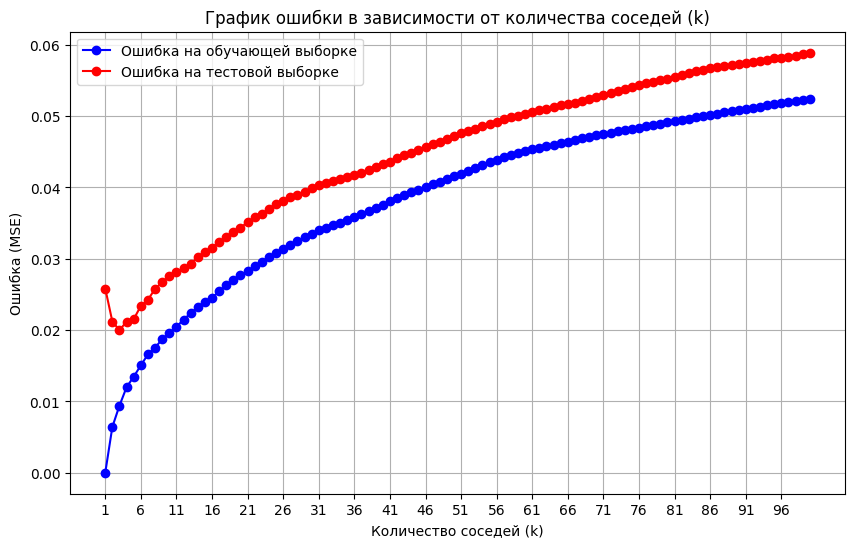

Оптимальное значение k: 3
Ошибка на train: 0.0094
Ошибка на test: 0.02
Ошибка на train (после оптимизации): 0.93%
Ошибка на test (после оптимизации): 2.06%


In [311]:
# Заполнение пропущенных значений средним значением
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    data[col] = data[col].fillna(data[col].mean())

# Разделение данных на X и y
target_column = 'rank'
X = data.drop([target_column], axis=1)
y = data[target_column]

# Формирование обучающей и тестовой выборок
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# Подбор оптимального значения k
k_values = range(1, 101)
train_err = []
test_err = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k, p=2)
    model.fit(X_train, y_train)
    
    # Предсказание на обучающей и тестовой выборках
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Расчет ошибок
    train_err.append(mean_squared_error(y_train, y_train_pred))
    test_err.append(mean_squared_error(y_test, y_test_pred))

# Построение графика ошибки в зависимости от количества соседей
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_err, marker='o', color='blue', label='Ошибка на обучающей выборке')
plt.plot(k_values, test_err, marker='o', color='red', label='Ошибка на тестовой выборке')
plt.title('График ошибки в зависимости от количества соседей (k)')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Ошибка (MSE)')
plt.xticks(np.arange(1, 101, step=5))
plt.grid()
plt.legend()
plt.show()

# Определение оптимального значения k
best_k = k_values[np.argmin(test_err)]
print(f'Оптимальное значение k: {best_k}')
print(f'Ошибка на train: {round(train_err[best_k - 1], 4)}')
print(f'Ошибка на test: {round(test_err[best_k - 1], 4)}')

# Обучение модели с оптимальным k и вывод результатов
model = KNeighborsRegressor(n_neighbors=best_k, p=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Ошибка на train (после оптимизации): {round((1 - model.score(X_train, y_train)) * 100, 2)}%')
print(f'Ошибка на test (после оптимизации): {round((1 - model.score(X_test, y_test)) * 100, 2)}%')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred = knn.predict(X_test)

# Вычисление метрик
train_mse = mean_squared_error(y_train, knn.predict(X_train))
train_r2 = r2_score(y_train, knn.predict(X_train))
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f'Ошибка на обучающей выборке (MSE): {train_mse}')
print(f'Коэффициент детерминации на обучающей выборке (R2): {train_r2}')
print(f'Ошибка на тестовой выборке (MSE): {test_mse}')
print(f'Коэффициент детерминации на тестовой выборке (R2): {test_r2}')


Ошибка на обучающей выборке (MSE): 0.01269338482085088
Коэффициент детерминации на обучающей выборке (R2): 0.9871750561167674
Ошибка на тестовой выборке (MSE): 0.02199542258259113
Коэффициент детерминации на тестовой выборке (R2): 0.9788514623074567


In [324]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Определение моделей
models = {
    'SVR': SVR(),
    'GBT': GradientBoostingRegressor()
}

# Настройка параметров для GridSearch
param_grid = {
    'SVR': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'GBT': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
}

# Обучение моделей и вычисление ошибок
for name, model in models.items():
    if name == 'SVR':
        grid = GridSearchCV(model, param_grid['SVR'], cv=5)
    else:
        grid = GridSearchCV(model, param_grid['GBT'], cv=5)
    
    grid.fit(X_train, y_train)
    print(f'Лучшие параметры для {name}: {grid.best_params_}')
    y_pred = grid.predict(X_test)
    
    print(f'Ошибка на тестовой выборке {name} (MSE): {mean_squared_error(y_test, y_pred)}')
    print(f'Ошибка на тестовой выборке {name} (R^2): {r2_score(y_test, y_pred)}')



Лучшие параметры для SVR: {'C': 10, 'kernel': 'rbf'}
Ошибка на тестовой выборке SVR (MSE): 0.014517361534781718
Ошибка на тестовой выборке SVR (R^2): 0.9860415972249785
Лучшие параметры для GBT: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Ошибка на тестовой выборке GBT (MSE): 4.109651342714845e-06
Ошибка на тестовой выборке GBT (R^2): 0.9999960485816538


In [327]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Генерация несбалансированных данных
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.9, 0.1], n_informative=3,
                           n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=10)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Балансировка классов с помощью SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Обучение модели на сбалансированных данных
model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)

# Оценка модели
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       1.00      1.00      1.00        19

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [328]:
# Удаление коррелированных переменных
correlation_threshold = 0.8
corr_matrix = data.corr()
high_corr_var = np.where(corr_matrix > correlation_threshold)

# Находим переменные с корреляцией выше порога и удаляем их
for i in range(len(high_corr_var[0])):
    if high_corr_var[0][i] != high_corr_var[1][i]:
        colname = data.columns[high_corr_var[1][i]]
        data.drop(colname, axis=1, inplace=True)

# Проверка на коррелированные переменные
print("После удаления коррелированных переменных:")
print(data.corr())


После удаления коррелированных переменных:
                  type  diskCapacity  diskMark      rank     price  \
type          1.000000      0.118283 -0.409226  0.771740 -0.148009   
diskCapacity  0.118283      1.000000  0.228553 -0.146675  0.096315   
diskMark     -0.409226      0.228553  1.000000 -0.742176  0.113993   
rank          0.771740     -0.146675 -0.742176  1.000000 -0.164394   
price        -0.148009      0.096315  0.113993 -0.164394  1.000000   
driveValue   -0.108997      0.031143  0.235243 -0.205144 -0.120284   
priceperGB   -0.010939     -0.048667 -0.019090  0.027522  0.107992   
testDate     -0.628169      0.217623  0.618351 -0.781123  0.073105   
samples      -0.041250      0.026185  0.152416 -0.114874 -0.019862   

              driveValue  priceperGB  testDate   samples  
type           -0.108997   -0.010939 -0.628169 -0.041250  
diskCapacity    0.031143   -0.048667  0.217623  0.026185  
diskMark        0.235243   -0.019090  0.618351  0.152416  
rank           -0.20

In [ ]:
#В процессе анализа данных о жестких дисках было рассмотрено 8927 записей,
#  охватывающих различные модели SSD и HDD.
#  Основные признаки, включая название устройства, тип, емкость диска, рейтинг, цену и другие,
#  позволили провести всестороннее исследование характеристик и производительности накопителей.

#Категориальные и количественные признаки
#Категориальные признаки:

#В наборе данных выделены 2 категориальных признака: driveName и type.
#Уникальные значения в столбце type включают два типа: SSD и HDD.
#  Это важно для понимания различий в производительности и стоимости между типами накопителей.
#Количественные признаки:

#Анализ количественных признаков показал наличие 8 параметров:
#  diskCapacity, diskMark, rank, price, driveValue, priceperGB, testDate, samples.
#Обнаружено, что данные по price, driveValue и priceperGB имеют пропуски,
#  что может потребовать дополнительной обработки, чтобы избежать искажения результатов.
#Корреляционный анализ
#Корреляция между признаками показала следующие наиболее значимые зависимости:
#diskMark и driveValue имеют корреляцию 0.714237,
#  что указывает на сильную связь между производительностью диска и его ценностью.
#testDate также показал высокую корреляцию с driveValue (0.604732),
#  что может свидетельствовать о том, что новые модели имеют более высокую ценность на рынке.
#Проблемы с пропусками
#После обработки данных было выявлено, что столбцы price, driveValue и priceperGB содержат пропуски,
#  что может повлиять на точность дальнейшего анализа.
#Необходимо рассмотреть возможность заполнения пропусков либо удалением записей с отсутствующими значениями,
#  в зависимости от значимости этих параметров для целевого анализа.
#Уникальные значения и распределение цен
#Уникальные значения в столбце price показали разнообразие цен,
#  от 16 до 133.229442, что указывает на наличие как бюджетных, так и премиум решений на рынке.
#Разнообразие цен также подчеркивает необходимость в более глубоком анализе зависимости между ценой и другими характеристиками,
#  такими как емкость и производительность.
#Заключение
#Анализ данных жестких дисков предоставляет ценную информацию для потребителей и производителей,
#  позволяя выявить ключевые характеристики, которые влияют на выбор устройств.
#  Результаты могут быть использованы для улучшения предложений на рынке,
#  а также для информирования покупателей о лучших вариантах в зависимости от их потребностей.